In [6]:
using Plots

In [7]:
function euler2functions(df1::Function, 
                         df2::Function, 
                         a::Float64,
                         b::Float64,
                         h::Float64,
                         init_conditions::Vector)

    epsilon = h
    n = Int64((b-a)/epsilon)

    x = vec(a:h:b)
    z = zeros(n+1)
    T = zeros(n+1)

    # initial conditions
    T[1] = init_conditions[1]
    z[1] = init_conditions[2]

    for i in 2:n+1
        z[i] = z[i-1] + h*df1(T[i-1], z[i-1])
        T[i] = T[i-1] + h*df2(T[i-1], z[i-1])
    end


    return x, z, T
end


euler2functions (generic function with 1 method)

In [8]:
function shooting_method(df1::Function, 
                         df2::Function,
                         a::Real,
                         b::Real,
                         h::Real,
                         tol::Real,
                         firts_guess::Vector,
                         second_guess::Vector,
                         target::Real, 
                         method::String = "euler")

    if method == "euler"
        
        # First attempt
        x1, z1, T1 = euler2functions(df1, df2, a, b, h, firts_guess)

        # Second attempt
        x2, z2, T2 = euler2functions(df1, df2, a, b, h, second_guess)

        # Third attempt, making a better guess
        new_guess = [T1[1], z1[1] + ( (target - T1[end])*(z2[1] - z1[1])/(T2[end] - T1[end]) )]

        x3, z3, T3 = euler2functions(df1, df2, a, b, h, new_guess)
        return x3, z3, T3
    else 
        error("Method not implemented")
    end


end

shooting_method (generic function with 2 methods)

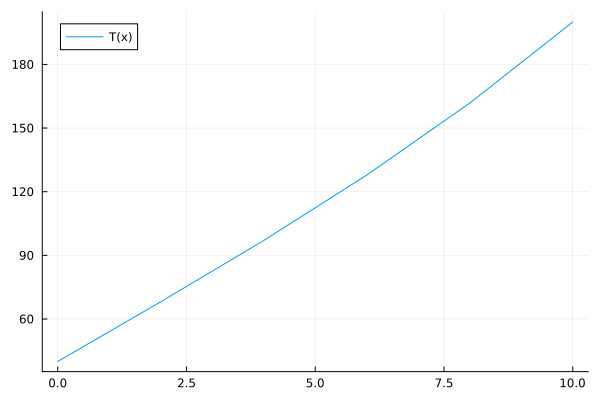

In [9]:
start  = 0.0
end_   = 10.0
h      = 2.0
tol    = 1e-6
α      = 0.01
Ta     = 20.0 
target = 200.0

f = (T, z) -> α*(T - Ta)
g = (T, z) -> z

first_guess  = [40.0, 10.0]
second_guess = [40.0, 20.0]

x, z, T = shooting_method2(f, g, start, end_, h, tol, first_guess, second_guess, target, "euler")
plot(x, T, label = "T(x)")